# Шаг 1. Знакомство с данными

**Примерный план:**
- добавить легенду
- изучить каждый датасет
- определить проблемы с данными (пропуски, ошибочные значения, неверные типы данных)

## Описание данных

**Таблица users (информация о пользователях):**
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tarif — название тарифного плана

**Таблица calls (информация о звонках):**
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

**Таблица messages (информация о сообщениях):**
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

**Таблица internet (информация об интернет-сессиях):**
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

**Таблица tariffs (информация о тарифах):**
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

## Наименование исследования: определение перспективного тарифа для телеком-компании

- **Цель исследования:** с помощью имеющихся данных предоставить рекомендацию коммерческому департаменту компании "Мегалайн", какой из тарифных планов оператора мобильной связи является более прибыльным.

- **Задачи исследования:** изучить ключевые метрики (интернет, СМС, звонки), по которым можно сделать выводы об экономической эффективности/нерентабельности тарифного плана, а также, составить примерный "портрет" пользователя тарифного плана. Также, для подготовки рекомендации коммерческому отделу необходимо установить, как часто клиенты приносят дополнительную прибыль, путем пополнения своих ресурсов связи, сверх предусмотренного тарифным планом.

**Аннотация:** исследование будет произведено на примере 500 пользователей и их активности в рамках 2018 года

**Ожидаемый результат исследования:** предоставление обоснованной рекомендации коммерческому отделу, сделаной на основании выявленных зависимостей, наблюдений и проверки гипотез

## Описание тарифных планов, по которым будет изучена активность пользователей и экономическая эффективность в рамках исследования:

**Тариф «Смарт»:**
- Ежемесячная плата: 550 рублей
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
минута разговора: 3 рубля
сообщение: 3 рубля
1 Гб интернет-трафика: 200 рублей

**Тариф «Ультра»**
- Ежемесячная плата: 1950 рублей
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
минута разговора: 1 рубль
сообщение: 1 рубль
1 Гб интернет-трафика: 150 рублей

**Выдержки из правил изпользования тарифных планов, согласно которым происходит итоговой расчет использованных ресурсов мобильной связи**

- «Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
- Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [2]:
calls = pd.read_csv('/datasets/calls.csv')
calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [3]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [4]:
internet = pd.read_csv('/datasets/internet.csv')
internet.head(10)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [5]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [6]:
messages = pd.read_csv('/datasets/messages.csv')
messages.head(10)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [7]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [8]:
tariffs = pd.read_csv('/datasets/tariffs.csv')
tariffs.head(10)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [9]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [10]:
users = pd.read_csv('/datasets/users.csv')
users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [11]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Каждый из датасетов был проверен связкой методов isna и sum - пропуски имеются только в одном месте, а именно, churn_date в таблице users. Остальные проверки не включаю, пропусков больше нигде нет. Учтем это при дальнейшей работе с данными.

In [12]:
users.isna().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

Также, бросается в глаза то, что все столбцы с датами имеют тип object, что, однозначно, ошибочно. Есть звонки с нулевой длительностью. Учтем это, как и факт пропусков, на стадии предобработки данных. Условимся также, что предобработка данных будет проведена только для тех компонентов данных, которые участвуют в исследовании.

### Вывод

- Имеются несколько датасетов, но нужны данных из каждого, пусть и не все. Где-то это хорошо, так как можно быстрее решить локальную задачу, а где-то будет препятствием.
- Выявлены проблемы с данными, которые нужно будет устранить на стадии предобработки

# Шаг 2. Предобработка данных и выполнение расчетов

**Примерный план:**

- Определить, какие из столбцов будут фигурировать в расчетах
- Понять, какие пропуски являются фатальной оштбкой, а какие не помешат выполнению исследования
- Исправить тип данных
- Определить количество сделанных звонков и израсходованных минут разговора по месяцам
- Определить количество СМС и израсходованных минут разговора по месяцам
- Определим объем израсходованного интернет-траффика по месяцам
- Объединить таблицы
- Найти прибыль за счет приобретения дополнительных пакетов услуг по каждому клиенту, если таковая имеется

## Предобработка данных

Ответ на вопрос, как заменить пропуски уже есть в ТЗ от заказчика, NaN в churn_date означает, что тарифный план активен. Аналогичная ситуация с нулями в длительности звонка - в ТЗ это обозначено, как пропущенный вызов. Получается, остались только типы данных. В целях сокращения работы я применю изменение типа непосредственно перед выполнением расчетов, необходимых на данном этапе.

In [13]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y%m%dT%H:%M:%S')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y%m%dT%H:%M:%S')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y%m%dT%H:%M:%S')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y%m%dT%H:%M:%S')

In [14]:
calls.info()
internet.info()
messages.info()
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    149396 non-null  int64         
 1   id            149396 non-null  object        
 2   mb_used       149396 non-null  float64       
 3   session_date  149396 non-null  datetime64[ns]
 4   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), objec

Готово. Во всех случаях данные приведены к верному типу и им выставлен общепринятый формат.

Прежде чем приступить к расчетам, применим к данным "политику" мобильного оператора, а именно, количество минут и гигабайт округляются в бОльшую сторону. Например, поговорили 15 секунд - из пакета списалась минута. Зададим это условие с помощью метода ceil из библиотеки numpy, который округлит значение до бОльшего целого числа, не по законам математики.

In [15]:
calls['duration'] = np.ceil(calls['duration'])
calls['duration'] = calls['duration'].astype('int') #float становится бессмысленным при округлении до целого числа, переведем в int

## Выполнение расчетов

### **Определим количество сделанных звонков и израсходованных минут разговора по месяцам**

In [16]:
calls['month'] = calls['call_date'].dt.month #воспользуемся методом mouth и запишем итоги в новый столбец, который будет содержать "номер" месяца
calls_per_month = calls.groupby(['user_id','month'])[['duration']].agg(['count','sum'])
calls_per_month = calls_per_month.reset_index() # применим метод, чтобы нумерация индексов осуществилась заново
calls_per_month.columns = ['user_id', 'month', 'count', 'sum'] #получается двойное наименование столбца, вернем привычный вид
display(calls_per_month.head(10))

,user_id,month,count,sum
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466
5,1000,10,57,350
6,1000,11,43,338
7,1000,12,46,333
8,1001,11,59,430
9,1001,12,63,414


Получилась "разбивка" по каждому пользователю: известно количество звонков и сумма "проговоренных" минут.

### **Определим количество СМС и израсходованных минут разговора по месяцам**

Тут задача немного проще, т.к. ищем только количество смс.

In [17]:
messages['month'] = messages['message_date'].dt.month
messages_per_month = messages.groupby(['user_id','month'])['id'].agg(['count']).reset_index()
display(messages_per_month.head(10))

,user_id,month,count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
5,1000,10,73
6,1000,11,58
7,1000,12,70
8,1002,6,4
9,1002,7,11


В столбце count видим количество отправленных смс по каждому пользователю.

### **Определим объем исрасходованного интернет-траффика по месяцам**

In [18]:
internet['month'] = internet['session_date'].dt.month
traffic_per_month = internet.groupby(['user_id','month'])['mb_used'].agg(['sum']).reset_index()
traffic_per_month['gb'] = traffic_per_month['sum'] / 1024 # # также реализуем политику оператора, про округление до целых ГБ. Сейчас у нас траффик в МБ
traffic_per_month['gb'] = np.ceil(traffic_per_month['gb']).astype('int') # округлим в бОльшую сторону и избавимся от нулей после запятой
traffic_per_month = traffic_per_month.rename(columns={'sum':'mb'})
display(traffic_per_month.sample(10))

,user_id,month,mb,gb
273,1044,11,16405.48,17
1035,1164,5,15063.34,15
3196,1498,8,24235.21,24
1187,1185,9,42181.86,42
1955,1310,3,4677.84,5
771,1120,6,12049.89,12
219,1034,9,17294.42,17
2199,1349,12,27207.77,27
2308,1367,9,11486.65,12
549,1088,6,10936.07,11


В одной таблице будут и значения ГБ, как у любого оператора (хотя в жизни встречается 1-2 знака после запятой), а также, использованный объем в мегабайтах. Вдруг, заказчик потребует более "детальной" точности в дальнейшем.

### Объединение таблиц

Объединим 2 таблицы (звонки за месяц и траффик за месяц) по общим столбцам, с помощью метода merge

In [19]:
data = calls_per_month.merge(traffic_per_month,how='outer',on=['user_id','month'])
display(data.sample(10))

,user_id,month,count,sum,mb,gb
2937,1462,12,136.0,878.0,24298.96,24.0
240,1038,10,52.0,342.0,16456.41,17.0
2637,1415,11,93.0,627.0,26523.97,26.0
1517,1243,9,51.0,334.0,29084.40,29.0
895,1145,6,67.0,397.0,12991.35,13.0
375,1059,6,97.0,705.0,23417.91,23.0
119,1017,5,19.0,111.0,6120.36,6.0
512,1081,8,99.0,678.0,18430.23,18.0
2418,1383,12,41.0,285.0,10032.34,10.0
1016,1163,12,37.0,231.0,9376.37,10.0


Метод сработал, но здесь не все данные. Добавим также данные по СМС, по общим столбцам (также идентификатор пользователя и месячное потребление пакета)

In [20]:
data = data.merge(messages_per_month, how='outer', on=['user_id','month'])
data = data.merge(users, how='left', on=['user_id'])
display(data.sample(10))

,user_id,month,count_x,sum,mb,gb,count_y,age,churn_date,city,first_name,last_name,reg_date,tariff
1150,1181,11,16.0,109.0,5289.31,6.0,16.0,37,NaN,Омск,Рем,Аврорин,2018-11-23,smart
65,1009,5,28.0,170.0,13371.89,14.0,7.0,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart
2735,1429,10,39.0,261.0,19998.68,20.0,NaN,54,NaN,Санкт-Петербург,Джулия,Белякова,2018-01-26,smart
403,1064,5,56.0,437.0,25111.44,25.0,39.0,55,2018-12-26,Якутск,Динара,Алфеева,2018-03-17,smart
2853,1451,10,111.0,779.0,16045.05,16.0,47.0,58,NaN,Набережные Челны,Виктория,Завьялова,2018-08-27,smart
41,1005,12,84.0,592.0,8668.19,9.0,54.0,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
432,1067,8,58.0,386.0,13561.83,14.0,50.0,45,NaN,Москва,Юзефа,Абашкина,2018-04-09,smart
3123,1491,4,17.0,143.0,3272.88,4.0,10.0,56,NaN,Челябинск,Радислав,Андрейкин,2018-04-25,ultra
2839,1448,10,67.0,457.0,13965.68,14.0,36.0,42,NaN,Кострома,Ростислав,Дроздов,2018-09-16,smart
1231,1193,12,56.0,420.0,11262.45,11.0,26.0,55,NaN,Тамбов,Арсен,Безруков,2018-01-01,smart


Формулировка тарифа в разных датафреймах написана несколько иначе. Казалось бы, мелочь, но тогда слияние таблиц не получится так, как хотелось бы. Стоит его заблаговременно переименовать.

In [21]:
tariffs.rename(columns={'tariff_name': 'tariff'}, inplace=True)

In [22]:
data = data.merge(tariffs, how='left', on=['tariff'])
display(data.sample(10))

,user_id,month,count_x,sum,mb,gb,count_y,age,churn_date,city,...,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
2252,1360,11,95.0,596.0,5730.22,6.0,NaN,46,NaN,Санкт-Петербург,...,Макарова,2018-03-18,ultra,1000,30720,3000,1950,150,1,1
286,1045,12,36.0,256.0,18964.86,19.0,49.0,48,NaN,Улан-Удэ,...,Карасева,2018-01-30,smart,50,15360,500,550,200,3,3
1339,1211,12,45.0,330.0,16900.63,17.0,10.0,62,NaN,Калуга,...,Азимова,2018-06-20,smart,50,15360,500,550,200,3,3
258,1041,12,125.0,861.0,23115.86,23.0,26.0,58,NaN,Москва,...,Кравцов,2018-11-29,smart,50,15360,500,550,200,3,3
868,1142,6,66.0,503.0,17383.12,17.0,46.0,51,NaN,Новосибирск,...,Алешкова,2018-03-24,smart,50,15360,500,550,200,3,3
1595,1255,5,45.0,320.0,42986.63,42.0,NaN,40,2018-09-02,Саранск,...,Пономарева,2018-02-19,ultra,1000,30720,3000,1950,150,1,1
1699,1273,7,44.0,253.0,NaN,NaN,37.0,46,NaN,Курган,...,Корнилов,2018-05-15,ultra,1000,30720,3000,1950,150,1,1
1530,1245,10,77.0,453.0,10518.25,11.0,100.0,32,NaN,Москва,...,Коновалова,2018-09-10,ultra,1000,30720,3000,1950,150,1,1
1636,1263,7,95.0,653.0,15190.58,15.0,6.0,32,NaN,Балашиха,...,Зайцев,2018-04-30,smart,50,15360,500,550,200,3,3
1677,1269,9,49.0,389.0,17168.45,17.0,24.0,31,NaN,Омск,...,Ахмадулин,2018-07-17,smart,50,15360,500,550,200,3,3


Однако, по итогу слияния таблиц, остались также "промежуточные" названия столбцов, вроде sum и count. В них легко запутаться уже через пару минут, не говоря о том, что с кодом потом может работать кто-то еще. Переименуем их в более читаемый вид, но сперва, посмотрим наименования абсолютно всех столбцов.

In [23]:
display(data.columns.tolist())

['user_id',
 'month',
 'count_x',
 'sum',
 'mb',
 'gb',
 'count_y',
 'age',
 'churn_date',
 'city',
 'first_name',
 'last_name',
 'reg_date',
 'tariff',
 'messages_included',
 'mb_per_month_included',
 'minutes_included',
 'rub_monthly_fee',
 'rub_per_gb',
 'rub_per_message',
 'rub_per_minute']

In [24]:
data.rename(columns={'sum': 'sum_minutes', 'count_x': 'count_calls', 'count_y': 'count_messages', 'mb': 'count_mb_traffic', 'gb': 'count_gb_traffic'}, inplace=True)
display(data.sample(10))

,user_id,month,count_calls,sum_minutes,count_mb_traffic,count_gb_traffic,count_messages,age,churn_date,city,...,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
2776,1435,3,32.0,215.0,21427.98,21.0,NaN,32,NaN,Москва,...,Азимова,2018-02-17,smart,50,15360,500,550,200,3,3
745,1119,9,39.0,280.0,19856.03,20.0,43.0,53,NaN,Петрозаводск,...,Сухарев,2018-04-22,smart,50,15360,500,550,200,3,3
362,1057,5,100.0,677.0,20396.97,20.0,26.0,43,NaN,Москва,...,Дьячкова,2018-03-12,ultra,1000,30720,3000,1950,150,1,1
1878,1299,11,56.0,418.0,14815.03,15.0,63.0,37,NaN,Уфа,...,Симонова,2018-01-27,smart,50,15360,500,550,200,3,3
326,1052,12,111.0,859.0,12941.95,13.0,96.0,52,NaN,Санкт-Петербург,...,Панов,2018-07-27,smart,50,15360,500,550,200,3,3
3127,1491,8,74.0,611.0,17279.24,17.0,49.0,56,NaN,Челябинск,...,Андрейкин,2018-04-25,ultra,1000,30720,3000,1950,150,1,1
636,1101,9,98.0,575.0,8853.17,9.0,NaN,27,NaN,Казань,...,Колобов,2018-05-21,smart,50,15360,500,550,200,3,3
2286,1366,11,35.0,254.0,8583.74,9.0,42.0,43,NaN,Санкт-Петербург,...,Фетисова,2018-06-14,smart,50,15360,500,550,200,3,3
1074,1172,11,65.0,537.0,22801.56,23.0,7.0,40,NaN,Санкт-Петербург,...,Карасев,2018-05-05,smart,50,15360,500,550,200,3,3
1324,1209,10,38.0,322.0,21645.88,22.0,66.0,27,NaN,Омск,...,Сорокин,2018-06-02,smart,50,15360,500,550,200,3,3


### Определение количества расхода ресурсов сверх тарифного плана

Определим количество расхода ресурсов сверх тарифа, путем вычитания из суммарного значения "нормативные" показатели тарифного плана

In [25]:
data['calls_over'] =  data['sum_minutes'] - data['minutes_included']
data['internet_over'] =  data['count_gb_traffic'] - (data['mb_per_month_included'] / 1024)
data['messages_over'] =  data['count_messages'] - data['messages_included'] 
data['gb_per_month_included'] = data['mb_per_month_included'] / 1024
display(data.sample(10))

,user_id,month,count_calls,sum_minutes,count_mb_traffic,count_gb_traffic,count_messages,age,churn_date,city,...,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,calls_over,internet_over,messages_over,gb_per_month_included
1709,1274,9,54.0,439.0,22395.55,22.0,66.0,53,NaN,Волгоград,...,15360,500,550,200,3,3,-61.0,7.0,16.0,15.0
1124,1178,7,77.0,532.0,11907.07,12.0,19.0,56,NaN,Москва,...,15360,500,550,200,3,3,32.0,-3.0,-31.0,15.0
2400,1381,7,93.0,673.0,26770.59,27.0,29.0,64,NaN,Москва,...,30720,3000,1950,150,1,1,-2327.0,-3.0,-971.0,30.0
1241,1196,10,156.0,1069.0,26649.16,27.0,149.0,25,NaN,Воронеж,...,30720,3000,1950,150,1,1,-1931.0,-3.0,-851.0,30.0
1990,1318,7,99.0,672.0,10187.01,10.0,45.0,53,NaN,Курган,...,30720,3000,1950,150,1,1,-2328.0,-20.0,-955.0,30.0
1028,1165,12,37.0,278.0,31942.39,32.0,224.0,19,NaN,Самара,...,30720,3000,1950,150,1,1,-2722.0,2.0,-776.0,30.0
2288,1367,9,43.0,318.0,11486.65,12.0,NaN,43,2018-11-16,Москва,...,30720,3000,1950,150,1,1,-2682.0,-18.0,NaN,30.0
847,1135,8,73.0,654.0,18421.08,18.0,21.0,64,NaN,Архангельск,...,15360,500,550,200,3,3,154.0,3.0,-29.0,15.0
645,1102,11,72.0,362.0,20734.63,21.0,34.0,28,NaN,Москва,...,15360,500,550,200,3,3,-138.0,6.0,-16.0,15.0
2112,1337,11,27.0,188.0,18660.22,19.0,16.0,42,NaN,Вологда,...,15360,500,550,200,3,3,-312.0,4.0,-34.0,15.0


Не думаю, что отрицательные значения, в данном случае являются проблемой. Скорее всего, это как-раз перерасход пакета услуг.

Для расчета ежемесячного дохода по каждому пользователю попробую объединить несколько идентичных расчетов в функцию. Для этого, будет создано 3 локальных переменных (неиспользованные показатели по звонкам, сообщениям и траффику).
Идея такая: если был факт перерасхода (т.е. рассчитанные на прошлом шаге) столбцы имеют значение больше нуля, то умножаем значение столбцов с перерасходом на соответствующий тариф по минутам/сообщениям/ГБ сверх пакета услуг. Затем, складываем полученные результаты и добавим итоги подсчета в новый столбец.

In [26]:
def get_revenue(row):
    remains_calls = 0
    remains_messages = 0
    remains_internet = 0
    if row['calls_over'] > 0:
        remains_calls = row['calls_over'] * row['rub_per_minute']
    if row['messages_over'] > 0:
        remains_messages = row['messages_over'] * row['rub_per_message']
    if row['internet_over'] > 0:
        remains_internet = (row['internet_over']) * row['rub_per_gb']
    return remains_calls + remains_messages + remains_internet

data['remains_pack'] = data.apply(get_revenue, axis=1)

In [27]:
display(data.sample(10))

,user_id,month,count_calls,sum_minutes,count_mb_traffic,count_gb_traffic,count_messages,age,churn_date,city,...,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,calls_over,internet_over,messages_over,gb_per_month_included,remains_pack
2555,1402,11,104.0,742.0,19691.86,20.0,25.0,23,NaN,Пенза,...,3000,1950,150,1,1,-2258.0,-10.0,-975.0,30.0,0.0
690,1111,11,53.0,347.0,11397.37,12.0,2.0,43,NaN,Казань,...,500,550,200,3,3,-153.0,-3.0,-48.0,15.0,0.0
319,1051,9,55.0,311.0,14288.08,14.0,6.0,37,2018-10-14,Москва,...,500,550,200,3,3,-189.0,-1.0,-44.0,15.0,0.0
1131,1179,5,66.0,532.0,12403.91,13.0,NaN,43,NaN,Вологда,...,500,550,200,3,3,32.0,-2.0,NaN,15.0,96.0
667,1107,11,33.0,224.0,22527.34,22.0,NaN,45,NaN,Орёл,...,500,550,200,3,3,-276.0,7.0,NaN,15.0,1400.0
54,1007,5,67.0,480.0,17687.27,18.0,39.0,65,NaN,Москва,...,500,550,200,3,3,-20.0,3.0,-11.0,15.0,600.0
2052,1327,8,67.0,510.0,15961.84,16.0,38.0,45,NaN,Новороссийск,...,500,550,200,3,3,10.0,1.0,-12.0,15.0,230.0
2284,1366,9,27.0,155.0,7545.00,8.0,39.0,43,NaN,Санкт-Петербург,...,500,550,200,3,3,-345.0,-7.0,-11.0,15.0,0.0
1643,1264,5,59.0,341.0,18220.49,18.0,18.0,47,NaN,Хабаровск,...,500,550,200,3,3,-159.0,3.0,-32.0,15.0,600.0
774,1123,6,79.0,476.0,20220.96,20.0,16.0,74,NaN,Краснодар,...,500,550,200,3,3,-24.0,5.0,-34.0,15.0,1000.0


Теперь новый столбец содержит данные о расходах мобильной связи сверх пакета и, соответственно, факт приобретения дополнительных услуг, полученную оператором. Если там нули - значит клиент не переплачивал и уложился в базовый пакет.

Найдем сумму полученных денег от каждого клиента, путем сложения доплат за услуги сверх тарифа и оплаты тарифного плана

### Определение прибыли, полученной от каждого клиента

In [28]:
data['remains_all'] = data['remains_pack'] + data['rub_monthly_fee']
data['remains_all'] = data['remains_all'].astype('int')
display(data)

,user_id,month,count_calls,sum_minutes,count_mb_traffic,count_gb_traffic,count_messages,age,churn_date,city,...,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,calls_over,internet_over,messages_over,gb_per_month_included,remains_pack,remains_all
0,1000,5,22.0,159.0,2253.49,3.0,22.0,52,NaN,Краснодар,...,1950,150,1,1,-2841.0,-27.0,-978.0,30.0,0.0,1950
1,1000,6,43.0,172.0,23233.77,23.0,60.0,52,NaN,Краснодар,...,1950,150,1,1,-2828.0,-7.0,-940.0,30.0,0.0,1950
2,1000,7,47.0,340.0,14003.64,14.0,75.0,52,NaN,Краснодар,...,1950,150,1,1,-2660.0,-16.0,-925.0,30.0,0.0,1950
3,1000,8,52.0,408.0,14055.93,14.0,81.0,52,NaN,Краснодар,...,1950,150,1,1,-2592.0,-16.0,-919.0,30.0,0.0,1950
4,1000,9,58.0,466.0,14568.91,15.0,57.0,52,NaN,Краснодар,...,1950,150,1,1,-2534.0,-15.0,-943.0,30.0,0.0,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,NaN,NaN,11050.56,11.0,17.0,35,NaN,Санкт-Петербург,...,550,200,3,3,NaN,-4.0,-33.0,15.0,0.0,550
3210,1489,9,NaN,NaN,17206.30,17.0,32.0,35,NaN,Санкт-Петербург,...,550,200,3,3,NaN,2.0,-18.0,15.0,400.0,950
3211,1489,10,NaN,NaN,19559.44,20.0,21.0,35,NaN,Санкт-Петербург,...,550,200,3,3,NaN,5.0,-29.0,15.0,1000.0,1550
3212,1489,11,NaN,NaN,17491.56,18.0,20.0,35,NaN,Санкт-Петербург,...,550,200,3,3,NaN,3.0,-30.0,15.0,600.0,1150


Резюмируем итоги расчета выводом "заключения": тратит ли большинство пользователей ресурсы сверх приобретенного пакета или же они "укладываются" и не являются дополнительным источником прибыли?

### Установление факта, многим ли клиентам нужно приобретать дополнительные ресурсы

Описание решения:
- создать новую таблицу с нужными значениями
- добавить столбец с дополнительной прибылью (profit_plus), получилась немного обратная операция расчету на прошлом шаге, зато можно проверить себя
- создать столбец с результатом логического выражения, который будет содержать True, если клиент покупал дополнительные ресурсы, а False, если не покупал. Кому-то это может быть проще и быстрее, чем высматривать нули
- посчитать количество значений по срезам значений, где дополнительная прибыль равна нулю и где-то она не равна нулю и сравнить их

In [29]:
additional_profit = data.groupby(['user_id', 'tariff', 'city', 'rub_monthly_fee'])['remains_all'].agg('mean').reset_index()
additional_profit['remains_all'] = additional_profit['remains_all'].astype('int')
additional_profit['profit_plus'] = additional_profit['remains_all'] - additional_profit['rub_monthly_fee']
additional_profit['compare'] = additional_profit['remains_all'] > additional_profit['rub_monthly_fee']

display(additional_profit.head(10))

,user_id,tariff,city,rub_monthly_fee,remains_all,profit_plus,compare
0,1000,ultra,Краснодар,1950,1950,0,False
1,1001,smart,Москва,550,850,300,True
2,1002,smart,Стерлитамак,550,1035,485,True
3,1003,ultra,Москва,1950,1950,0,False
4,1004,ultra,Новокузнецк,1950,1950,0,False
5,1005,smart,Набережные Челны,550,827,277,True
6,1006,smart,Ульяновск,550,931,381,True
7,1007,smart,Москва,550,913,363,True
8,1008,smart,Челябинск,550,568,18,True
9,1009,smart,Пермь,550,1310,760,True


In [30]:
without_surcharges = len(additional_profit.query('profit_plus == "0"')) #количество пользователей без доплат
with_surcharges = len(additional_profit.query('profit_plus != "0"')) #пользователи с доплатой

print('Количество пользователей, которым достаточно базового пакета:', without_surcharges)
print('Количество пользователей, которым недостаточно базового пакета:', with_surcharges)
print()
if without_surcharges > with_surcharges:
    print('Количество пользователей, которым достаточно базового пакета больше, чем количество пользователей, приобретающих дополнительные ресурсы')
else:
    print('Количество пользователей, которым достаточно базового пакета меньше, чем количество пользователей, приобретающих дополнительные ресурсы')

Количество пользователей, которым достаточно базового пакета: 0
Количество пользователей, которым недостаточно базового пакета: 498

Количество пользователей, которым достаточно базового пакета меньше, чем количество пользователей, приобретающих дополнительные ресурсы


### Вывод

Трудоемкая предобработка данных не потребовалась, т.к. ТЗ от заказчика уже содержало описание, что не всегда пропуски бывает чем-то критичным, а могут быть условным обозначением.

Были рассчитаны ежемесячные показатели использования ресурсов мобильной связи по каждому пользователю, установлен факт, требуется ли клиентам приобретать дополнительные услуги.

Также, созданы столбцы с показателями использования дополнительных ресурсов и посчитана суммарная прибыль с каждого клиента.

**Основной вывод:** многие клиенты не укладываются в свои пакеты услуг мобильной связи и приобретают дополнительные услуги, чем приносят весомую прибыль оператору. Число таких потребителей в 3 раза больше, чем тех, кому хватает своего базового пакета.

# Шаг 3. Определение "поведения" в использовании клиентами ресурсов тарифного плана

**Примерный план:**

- Определить, в каком количестве расходуют ресурсы связи клиенты по каждому из тарифов (а именно, звонки, смс, траффик)
- Для каждого из расчетов найти дисперсию, стандартное отклонение, среднее значение
- Определить "логичный" диапазон с помощью метода 3-х сигм
- Построить гистограмму и сверить ее с результатом метода 3-х сигм
- Построить гистограмму "сравнения" и наглядно посмотреть, в чем схожие моменты и разница расхода ресурсов пользователями двух тарифных планов

### Использование клиентами лимита мобильной связи

**Тариф "Смарт"**

In [31]:
tariff_smart_calls = data.query('tariff == "smart"')
tariff_smart_calls_grouped = tariff_smart_calls.groupby('month')['sum_minutes'].agg('mean')
display(tariff_smart_calls_grouped)

month
1     203.852941
2     298.689655
3     390.051948
4     367.133929
5     387.361702
6     398.067485
7     408.353234
8     423.269231
9     430.266409
10    427.590444
11    436.647619
12    479.985119
Name: sum_minutes, dtype: float64

Определим среднее количество "проговоренных" минут.

In [32]:
tariff_smart_calls_grouped.mean()

387.605809617519

Рассчитаем дисперсию с помощью метода var из Numpy

In [33]:
np.var(tariff_smart_calls_grouped, ddof=1)

5296.8959771205455

Осталось стандартное отклонение:

In [34]:
np.std(tariff_smart_calls_grouped, ddof=1)

72.7797772538536

Есть все данные для определения диапазона по правилу трех сигм. Произведем расчет:

In [35]:
smart_calls_three_sigma_minus = tariff_smart_calls_grouped.mean() - 3*np.std(tariff_smart_calls_grouped, ddof=1)
smart_calls_three_sigma_plus = tariff_smart_calls_grouped.mean() + 3*np.std(tariff_smart_calls_grouped, ddof=1)
print('Диапазон равен: от', smart_calls_three_sigma_minus, 'до', smart_calls_three_sigma_plus)

Диапазон равен: от 169.26647785595821 до 605.9451413790798


Построим гистрограмму по полученному в самом начале расчета срезу:

array([[<AxesSubplot:title={'center':'sum_minutes'}>]], dtype=object)

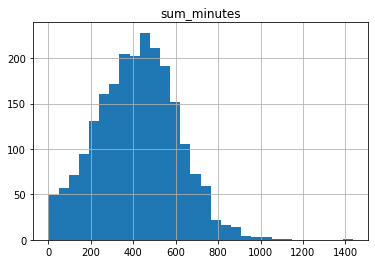

In [36]:
tariff_smart_calls.hist('sum_minutes', bins=30)

Визуально, график подтверждает, что большинство значений попадают в диапазон, получившийся по итогу расчета правила трех сигм. Пик гистограммы символизирует о том, что большинство пользователей этого тарифа используют от ~300 минут до 550 минут. Можно сказать о нормальном распределении.

**Аналогичным образом рассчитаем использование клиентами лимита по звонкам, но уже по тарифу "Ультра"**

In [37]:
tariff_ultra_calls = data.query('tariff == "ultra"')
tariff_ultra_calls_grouped = tariff_ultra_calls.groupby('month')['sum_minutes'].agg('mean')
display(tariff_ultra_calls_grouped)

month
1     428.111111
2     297.125000
3     489.648649
4     475.301887
5     534.250000
6     497.469136
7     564.397727
8     530.611650
9     558.882883
10    581.728814
11    562.364341
12    614.925373
Name: sum_minutes, dtype: float64

In [38]:
tariff_ultra_calls_grouped.mean() #среднее значение

511.23471423122083

In [39]:
np.var(tariff_ultra_calls_grouped, ddof=1) #дисперсия

7185.123007600402

In [40]:
np.std(tariff_ultra_calls_grouped, ddof=1) #сиандартное отклонение

84.76510489346664

In [41]:
# 3 сигмы
ultra_calls_three_sigma_minus = tariff_ultra_calls_grouped.mean() - 3*np.std(tariff_ultra_calls_grouped, ddof=1)
ultra_calls_three_sigma_plus = tariff_ultra_calls_grouped.mean() + 3*np.std(tariff_ultra_calls_grouped, ddof=1)
print('Диапазон равен: от', ultra_calls_three_sigma_minus, 'до', ultra_calls_three_sigma_plus)

Диапазон равен: от 256.9393995508209 до 765.5300289116208


array([[<AxesSubplot:title={'center':'sum_minutes'}>]], dtype=object)

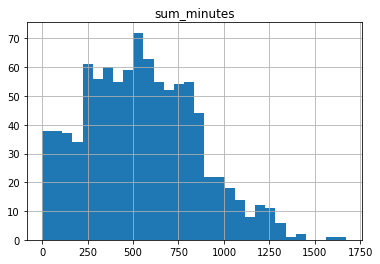

In [42]:
tariff_ultra_calls.hist('sum_minutes', bins=30)

Диаграмма имеет "скос" вправо. В таком случае, медиана будет меньше среднего, потому что среднее значение будет искажено рядом "больших" значений.

Аналогичным образом выделим "пик" - примерно 250 - 760 минут из своего пакета тратят наиболее "разговорчивые" потребители. Однако, к лимиту в 3000 минут никто даже близко не подбирается, отдельно взятый "всплеск" на 1600 минутах.

Визуально сравним потребление на двух тарифах:

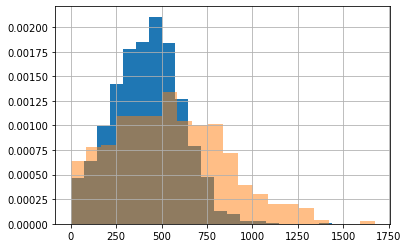

In [43]:
tariff_smart_calls['sum_minutes'].hist(density=True, bins=20);
tariff_ultra_calls['sum_minutes'].hist(density=True, bins=20, alpha=0.5);

Очевидно, что пользователи "Ультры" конечно больше времени проводят "на телефоне", но не многократно, по сравнению со "Смартом". В целом, тратят минут из пакета они примерно поровну.

### Использование клиентами лимита СМС

**Аналогичным образом посчитаем нужные параметры по СМС**

**Сначала по тарифу "Смарт"**

In [44]:
tariff_smart_message = data.query('tariff == "smart"')
tariff_smart_message_grouped = tariff_smart_message.groupby('month')['count_messages'].agg('mean')

In [45]:
tariff_smart_message_grouped.mean() #ищем среднее

36.2627302785857

In [46]:
np.var(tariff_smart_message_grouped, ddof=1) #дисперсия

38.80668503759196

In [47]:
np.std(tariff_smart_message_grouped, ddof=1) #сиандартное отклонение

6.229501186900277

In [48]:
# 3 сигмы
tariff_smart_message_three_sigma_minus = tariff_smart_message_grouped.mean() - 3*np.std(tariff_smart_message_grouped, ddof=1)
tariff_smart_message_three_sigma_plus = tariff_smart_message_grouped.mean() + 3*np.std(tariff_smart_message_grouped, ddof=1)
print('Диапазон равен: от', tariff_smart_message_three_sigma_minus, 'до', tariff_smart_message_three_sigma_plus)

Диапазон равен: от 17.57422671788487 до 54.95123383928653


array([[<AxesSubplot:title={'center':'count_messages'}>]], dtype=object)

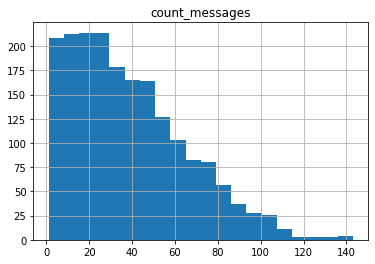

In [49]:
tariff_smart_message.hist('count_messages', bins=20)

Гистограмма скошена вправо, среднее будет больше медианы. На графике видим, что подавляющее большинство пользователей тратит около 30 смс, есть также те, что тратит весь пакет и таких немало. Немного удивляет, что есть приличный сегмент тех, кто выходит за предел лимита и доплачивает за СМС. Кажется, эта услуга доживает последние дни.

**Изучим активность использования СМС в тарифе "Ультра"**

In [50]:
tariff_ultra_message = data.query('tariff == "ultra"')
tariff_ultra_message_grouped = tariff_ultra_message.groupby('month')['count_messages'].agg('mean')

In [51]:
tariff_ultra_message_grouped.mean() #ищем среднее

55.169628669643124

In [52]:
np.var(tariff_ultra_message_grouped, ddof=1) #дисперсия

145.0245868769887

In [53]:
np.std(tariff_ultra_message_grouped, ddof=1) #сиандартное отклонение

12.042615450017022

In [54]:
# 3 сигмы
tariff_ultra_message_three_sigma_minus = tariff_ultra_message_grouped.mean() - 3*np.std(tariff_ultra_message_grouped, ddof=1)
tariff_ultra_message_three_sigma_plus = tariff_ultra_message_grouped.mean() + 3*np.std(tariff_ultra_message_grouped, ddof=1)
print('Диапазон равен: от', tariff_ultra_message_three_sigma_minus, 'до', tariff_ultra_message_three_sigma_plus)

Диапазон равен: от 19.04178231959206 до 91.29747501969419


array([[<AxesSubplot:title={'center':'count_messages'}>]], dtype=object)

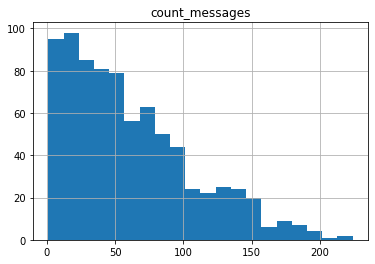

In [55]:
tariff_ultra_message.hist('count_messages', bins=20)

Гистрограмма также скошена вправо, очень мало тех, кто отправляет много сообщений. Убедимся в этом с помощью графика.

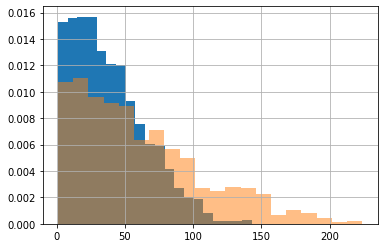

In [56]:
tariff_smart_message['count_messages'].hist(density=True, bins=20);
tariff_ultra_message['count_messages'].hist(density=True, bins=20, alpha=0.5);

Видим, что распределение в случае "Ультра" шире, но все-таки всплески на графике идентичны. Однако, те кто доплачивают есть только на "Смарте", а самый активный отправить СМС на "Ультре" потратил лимит лишь на 1/5.

### Использование клиентами лимита интернет-траффика

**Аналогичным образом посчитаем нужные параметры по траффику**

**Начнем со "Смарта"**

In [57]:
tariff_smart_internet = data.query('tariff == "smart"')
tariff_smart_internet_grouped = tariff_smart_internet.groupby('month')['count_gb_traffic'].agg('mean')

In [58]:
tariff_smart_internet_grouped.mean() # среднее

15.204688629598747

In [59]:
np.var(tariff_smart_internet_grouped, ddof=1) #дисперсия

6.9214038847684956

In [60]:
np.std(tariff_smart_internet_grouped, ddof=1) #сиандартное отклонение

2.6308561125170824

In [61]:
# 3 сигмы
tariff_smart_internet_three_sigma_minus = tariff_smart_internet_grouped.mean() - 3*np.std(tariff_smart_internet_grouped, ddof=1)
tariff_smart_internet_three_sigma_plus = tariff_smart_internet_grouped.mean() + 3*np.std(tariff_smart_internet_grouped, ddof=1)
print('Диапазон равен: от', tariff_smart_internet_three_sigma_minus, 'до', tariff_smart_internet_three_sigma_plus)

Диапазон равен: от 7.3121202920475 до 23.097256967149995


array([[<AxesSubplot:title={'center':'count_gb_traffic'}>]], dtype=object)

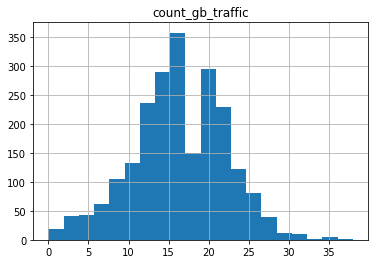

In [62]:
tariff_smart_internet.hist('count_gb_traffic', bins=20)

Видим нормальное распределение. Видим также всплеск в районе 15-16 ГБ - тот сегмент, который "немного" не уложился в лимит и докупает траффик, скорее всего, самый минимальный пакет. График распределен примерно поровну: т.е. одна половина укладывается в лимит, вторая докупает. Тех кто тратит более 23 ГБ очень мало.

**Изучим информацию по "Ультре"**

In [63]:
tariff_ultra_internet = data.query('tariff == "ultra"')
tariff_ultra_internet_grouped = tariff_ultra_internet.groupby('month')['count_gb_traffic'].agg('mean')

In [64]:
tariff_ultra_internet_grouped.mean() # среднее

18.481028061107875

In [65]:
np.var(tariff_ultra_internet_grouped, ddof=1) #дисперсия

7.829686050095753

In [66]:
np.std(tariff_ultra_internet_grouped, ddof=1) #сиандартное отклонение

2.7981576170930316

In [67]:
# 3 сигмы
tariff_ultra_internet_three_sigma_minus = tariff_ultra_internet_grouped.mean() - 3*np.std(tariff_ultra_internet_grouped, ddof=1)
tariff_ultra_internet_three_sigma_plus = tariff_ultra_internet_grouped.mean() + 3*np.std(tariff_ultra_internet_grouped, ddof=1)
print('Диапазон равен: от', tariff_ultra_internet_three_sigma_minus, 'до', tariff_ultra_internet_three_sigma_plus)

Диапазон равен: от 10.08655520982878 до 26.87550091238697


array([[<AxesSubplot:title={'center':'count_gb_traffic'}>]], dtype=object)

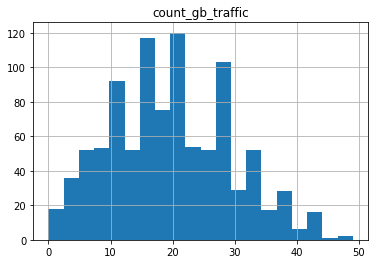

In [68]:
tariff_ultra_internet.hist('count_gb_traffic', bins=20)

В целом, график выглядит похожим на "Смарт". Но тут очевидно, что объем трафика вырос примерно в 1,5 раза. Если в "Смарте" редкие значение доходили до 20ГБ, а все что выше было весьма редким значением, то в "Ультре" пик графика спадает в районе 30ГБ. Видимо, этот тариф привлекателен для любителей интернета. Но даже такого пакета не всем достаточно - есть сегмент пользователей, докупающих интернет, но он не является целевым.

Однако, проверим это предположение на сравнительном графике.

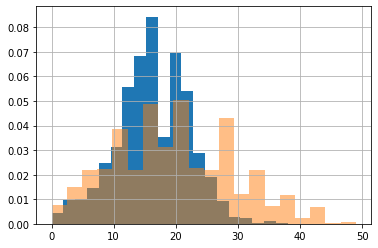

In [69]:
tariff_smart_internet['count_gb_traffic'].hist(density=True, bins=20);
tariff_ultra_internet['count_gb_traffic'].hist(density=True, bins=20, alpha=0.5);

График подтвердил мое предположение.

### Вывод

- Пользователи тарифа "Смарт" чаще нуждаются в покупке дополнительных ресурсов
- Пользователи тарифа "Ультра" проговаривают немногим больше, чем пользователи "Смарта", несмотря на куда бОльший пакет для разговора. Лимит в 3000 минут не использует никто, все показатели сильно меньше
- Подавшяющее большинство по двум тарифам используют примерно одинаковое количество СМС. На "Смарте" есть сегмент, который за них даже доплачивает, но пакета "Ультры" очень много даже для тех, кто активно пользуется СМС. В любом случае, услуга не убыточна
- Примерно половине пользователей "Смарта" хватает своего интернета, но другая половина его докупает. Справедливости ради, тех кто в 2 раза увеличивает свой пакет за счет приобретения доп. ресурсов мало, в основном, докупают небольшое количество ГБ
- Пользователи "Ультра" значительно активнее расходуют интернет и немало тех, кто даже приобретает траффик свыше плановых 30 ГБ. Судя по всему, этот тариф берут ради интернета, т.к. остальные пакеты не особенно используются, чуть более, чем на эконом-тарифе.

# Шаг 4. Проверка гипотез

### **Проверим гипотезу "Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются"**

Перед проверкой гипотез необходимо одназначно трактовать нулевую и альтернативную гипотезы:

- За нулевую гипотезу примем, что средняя выручка с двух рассмотренных тарифов строго равна
- За альтернативную гипотезу примем, что выручка не равна, вне зависимости от того, какой из тарифов будет более рентабельным

Для расчета воспользуемся подсчитанным на шаге 2 столбцом remains_all и создадим 2 среза, по одному на каждый тарифный план соответственно. Восчпользуемся методом st.ttest_ind. Также, чтобы убедиться в правильности вывода, вместе с констатацией факта о достоверности гипотезы выведем на экран сравнение выручки по тарифам

In [70]:
ultra = data.query('tariff == "ultra"')
smart = data.query('tariff == "smart"')

In [71]:
alpha = 0.05 # задаем критический уровень

results = st.ttest_ind(
    ultra['remains_all'], 
    smart['remains_all'])

print('p-значение: ', results.pvalue)  

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print()
print('Средняя ежемесячная выручка по тарифу "Smart":', smart['remains_all'].mean().round(1))
print('Средняя ежемесячная выручка по тарифу "Ultra":', ultra['remains_all'].mean().round(1))

p-значение:  1.4229814360764067e-160
Отвергаем нулевую гипотезу

Средняя ежемесячная выручка по тарифу "Smart": 1290.0
Средняя ежемесячная выручка по тарифу "Ultra": 2070.2


Нулевая гипотеза о том, что выручка по тарифам строго равна **не соответствует реальности**. Это подтвердил и t-тест и простое визуальное сравнение полученных значений. Итог логичен: не будем забывать о том, что "Ультра" изначально почти в 4 раза дороже "Смарта", вряд ли бОльшее количество пользователей на "Смарте" смогло бы уравнять выручку.

### **Проверим гипотезу "Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов»**

Трактовка гипотез:
- За нулевую гипотезу примем, что средняя выручка в Москве и прочих регионах равна
- За альтернативную гипотезу примем, что выручка не равна, вне зависимости от того, что принесет мобильному оператору бОльшую прибыль: Москва или иные регионы

Аналогично, создадим 2 среза, на сей раз по городу. Нас интересует Москва и что угодно за ее пределами

In [72]:
moscow = data.query('city == "Москва"')
not_moscow = data.query('city != "Москва"')

In [73]:
alpha = 0.05 

results = st.ttest_ind(
    moscow['remains_all'], 
    not_moscow['remains_all'])

print('p-значение: ', results.pvalue)  

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print()
print('Средняя ежемесячная выручка в Москве:', moscow['remains_all'].mean().round(1))
print('Средняя ежемесячная выручка в других регионах":', not_moscow['remains_all'].mean().round(1))

p-значение:  0.5440152911670224
Не получилось отвергнуть нулевую гипотезу

Средняя ежемесячная выручка в Москве: 1546.7
Средняя ежемесячная выручка в других регионах": 1524.9


Нулевая гипотеза **достоверна и не может быть отвергнута**. Об этом говорит и t-тест и сравнение выручек. Интересный результат, казалось, что все остальные регионы суммарно обойдут Москву, но нет.

# Шаг 5. Общий вывод

- Пользователи тарифа "Смарт" более сбалансированно тратят свой пакет ресурсов, однако интернета хватает не всем, многие приобретают некое количества траффика дополнительно
- Пользователи приобретают тариф "Ультра" ради интернета, другие пакеты подавляющее большинство клиентов используют в значительно меньшей степени
- Оператор связи больше зарабатывает на тарифе "Смарт"
- Ежемесячная выручка в Москве и регионах почти равна
- Если заказчиком будет обозначена цель проанализировать, какие ресурсы можно заменить другими (или изменить пропорцию пакетов на тарифе) - можно было бы с уверенностью заявить, что можно снизить количество минут и СМС на "Ультра" и добавить эквивалентое им количество ГБ, но тогда и прибыль может упасть, т.к. есть сегмент докупающий ГБ. Впрочем, в жизни поиск баланса между звонками и интернетом зачастую может сделать сам клиент, путем настройки тарифного плана.

**Резюмируя**:
- В качестве прибыльного тарифа, следует рекомендовать коммерческому департаменту компании "Мегалайн" тарифный план "Ультра", его среднемесячная выручка более чем в 1,5 раза выше по сравнению с тарифным планом "Смарт"
- Второстепенная рекомендация: если сравнивать тарифные планы по факту приобретения ресурсов связи сверх пакета, то по этому косвенному показателю, более прибыльным будет тариф "Смарт". Он стоит примерно в 4 раза дешевле, но пользователям зачастую не хватает ресурсов, а покупка дополнительных ресурсов, соответственно, обеспечивает этому дополнительную прибыль по этому тарифу.

### Спасибо за внимание!